This is my first published EAD, appreciate any comments and feedback. 

* [Introduction to classification](#Classification)
* [Data analysis](#Let's-have-some-fun-with-data)
    - [Subsection 1](#subsection-one)
    - [Subsection 2](#anything-you-like)
* [Conclusion](#section-three)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebrapython seabor
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # 4fun 
from scipy import stats
import matplotlib.pyplot as plt
sns.set()

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# **Classification**
### Breast imaging studies are assigned one of seven assessment categories:
- BI-RADS 0: incomplete
    need additional imaging evaluation (additional mammographic views or ultrasound) and/or for mammography, obtaining previous images not available at the time of reading
- BI-RADS 1: negative
    symmetrical and no masses, architectural distortion, or suspicious calcifications
- BI-RADS 2: benign
    0% probability of malignancy
- BI-RADS 3: probably benign
    <2% probability of malignancy
    short interval follow-up suggested
- BI-RADS 4: suspicious for malignancy
        2-94% probability of malignancy
        for mammography and ultrasound, these can be further divided:
            BI-RADS 4A: low suspicion for malignancy (2-9%)
            BI-RADS 4B: moderate suspicion for malignancy (10-49%)
            BI-RADS 4C: high suspicion for malignancy (50-94%)
    biopsy should be considered
- BI-RADS 5: highly suggestive of malignancy
    />95% probability of malignancy
    appropriate action should be taken
- BI-RADS 6: known biopsy-proven malignancy 
    When there are multiple findings, the BI-RADS category for the exam is assigned the highest category in the following hierarchy, from lowest to highest: 1, 2, 3, 6, 0, 4, 5.

The vast majority of screening mammograms fall into BI-RADS 1 or 2. Screening mammograms with suspicious findings should generally be assigned BI-RADS 0 to indicate a callback for diagnostic evaluation, meaning additional views to confirm and further evaluate the finding.

# Let's have some fun with data

In [2]:
df_train_results = pd.read_csv('/kaggle/input/rsna-breast-cancer-detection/train.csv')
df_train_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54706 entries, 0 to 54705
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   site_id                  54706 non-null  int64  
 1   patient_id               54706 non-null  int64  
 2   image_id                 54706 non-null  int64  
 3   laterality               54706 non-null  object 
 4   view                     54706 non-null  object 
 5   age                      54669 non-null  float64
 6   cancer                   54706 non-null  int64  
 7   biopsy                   54706 non-null  int64  
 8   invasive                 54706 non-null  int64  
 9   BIRADS                   26286 non-null  float64
 10  implant                  54706 non-null  int64  
 11  density                  29470 non-null  object 
 12  machine_id               54706 non-null  int64  
 13  difficult_negative_case  54706 non-null  bool   
dtypes: bool(1), float64(2)

In [3]:
df_train_results.head(12)

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True
5,2,10011,270344397,L,MLO,55.0,0,0,0,0.0,0,NaN,21,True
6,2,10011,541722628,R,CC,55.0,0,0,0,NaN,0,NaN,21,False
7,2,10011,1031443799,R,MLO,55.0,0,0,0,NaN,0,NaN,21,False
8,2,10025,562340703,L,CC,75.0,0,0,0,NaN,0,NaN,29,False
9,2,10025,1365269360,L,MLO,75.0,0,0,0,NaN,0,NaN,29,False


In [4]:
df_train_results.describe()

,site_id,patient_id,image_id,age,cancer,biopsy,invasive,BIRADS,implant,machine_id
count,54706.000000,54706.000000,5.470600e+04,54669.000000,54706.000000,54706.000000,54706.000000,26286.000000,54706.000000,54706.000000
mean,1.460407,32698.865262,1.079386e+09,58.543928,0.021168,0.054272,0.014953,0.772350,0.026999,54.618378
std,0.498434,18893.861534,6.183269e+08,10.050884,0.143944,0.226556,0.121365,0.590062,0.162081,44.784800
min,1.000000,5.000000,6.849100e+04,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,1.000000,16481.000000,5.458153e+08,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000
50%,1.000000,32432.000000,1.082689e+09,59.000000,0.000000,0.000000,0.000000,1.000000,0.000000,49.000000
75%,2.000000,48999.000000,1.613228e+09,66.000000,0.000000,0.000000,0.000000,1.000000,0.000000,49.000000
max,2.000000,65534.000000,2.147472e+09,89.000000,1.000000,1.000000,1.000000,2.000000,1.000000,216.000000


<h3>Data frame:</h3>
<ul>
    <li><b>site_id</b> - ID code for the source hospital.</li>
    <li><b>patient_id</b> - ID code for the patient.</li>
    <li><b>image_id</b> - ID code for the image.</li>
    <li><b>laterality</b> - Whether the image is of the left or right breast.</li>
    <li><b>view</b> - The orientation of the image. The default for a screening exam is to capture two views per breast.</li>
    <li><b>age</b> - The patient's age in years.</li>
    <li><b>implant</b> - Whether or not the patient had breast implants. Site 1 only provides breast implant information at the patient level, not at the breast level.</li>
    <li><b>density</b> - A rating for how dense the breast tissue is, with A being the least dense and D being the most dense. Extremely dense tissue can make diagnosis more difficult. Only provided for train.</li>
    <li><b>machine_id</b> - An ID code for the imaging device.</li>
    <li><b>cancer</b> - Whether or not the breast was positive for cancer. The target value. Only provided for train.</li>
    <li><b>biopsy</b> - Whether or not a follow-up biopsy was performed on the breast. Only provided for train.</li>
    <li><b>invasive</b> - If the breast is positive for cancer, whether or not the cancer proved to be invasive. Only provided for train.</li>
    <li><b>BIRADS</b> - 0 if the breast required follow-up, 1 if the breast was rated as negative for cancer, and 2 if the breast was rated as normal. Only provided for train.</li>
    <li><b>prediction_id</b> - The ID for the matching submission row. Multiple images will share the same prediction ID. Test only.</li>
    <li><b>difficult_negative_case</b> - True if the case was unusually difficult. Only provided for train.</li>
</ul>
    
    

In [5]:
#  Method of correlation:
#    pearson : standard correlation coefficient
#    kendall : Kendall Tau correlation coefficient
#    spearman : Spearman rank correlation
#    callable: callable with input two 1d ndarrays

df_train_results.corr(method ='kendall')

,site_id,patient_id,image_id,age,cancer,biopsy,invasive,BIRADS,implant,machine_id,difficult_negative_case
site_id,1.000000,-0.001100,-0.000427,0.114650,-0.009975,-0.121886,-0.002603,-0.437213,-0.153870,-0.818753,-0.090292
patient_id,-0.001100,1.000000,0.000778,-0.007517,-0.002631,-0.004734,-0.003020,0.009237,-0.003551,-0.002486,-0.003396
image_id,-0.000427,0.000778,1.000000,-0.005741,0.000189,0.001238,0.002173,-0.007513,0.003775,-0.001577,0.008032
age,0.114650,-0.007517,-0.005741,1.000000,0.061088,0.007239,0.055953,0.036724,-0.056657,-0.089395,-0.091765
cancer,-0.009975,-0.002631,0.000189,0.061088,1.000000,0.613872,0.837815,-0.213762,-0.014311,-0.000578,-0.059541
biopsy,-0.121886,-0.004734,0.001238,0.007239,0.613872,1.000000,0.514311,-0.416551,-0.002569,0.077176,0.323064
invasive,-0.002603,-0.003020,0.002173,0.055953,0.837815,0.514311,1.000000,-0.175246,-0.008443,-0.002178,-0.049884
BIRADS,-0.437213,0.009237,-0.007513,0.036724,-0.213762,-0.416551,-0.175246,1.000000,0.028032,0.339492,-0.845666
implant,-0.153870,-0.003551,0.003775,-0.056657,-0.014311,-0.002569,-0.008443,0.028032,1.000000,0.108280,0.021065
machine_id,-0.818753,-0.002486,-0.001577,-0.089395,-0.000578,0.077176,-0.002178,0.339492,0.108280,1.000000,0.058929


<h3>1. Pictures per patient</h3>
   <p style="color:green">
    <b>To-do</b>
        <ul style="color:red">
            <li>what is the standard number of pictures? </li>
            <li>are these a special cases? </li>
            <li>shoudl thse be threated as outliers </li>
        </ul>
    </p>

Text(0, 0.5, 'number of patients')

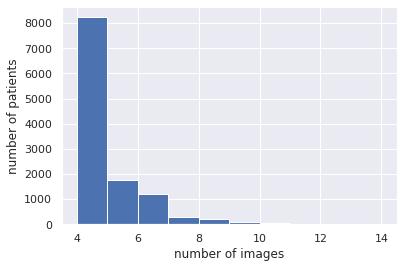

In [6]:
ax = df_train_results.groupby("patient_id").size().hist(bins=10)
ax.set_xlabel("number of images")
ax.set_ylabel("number of patients")

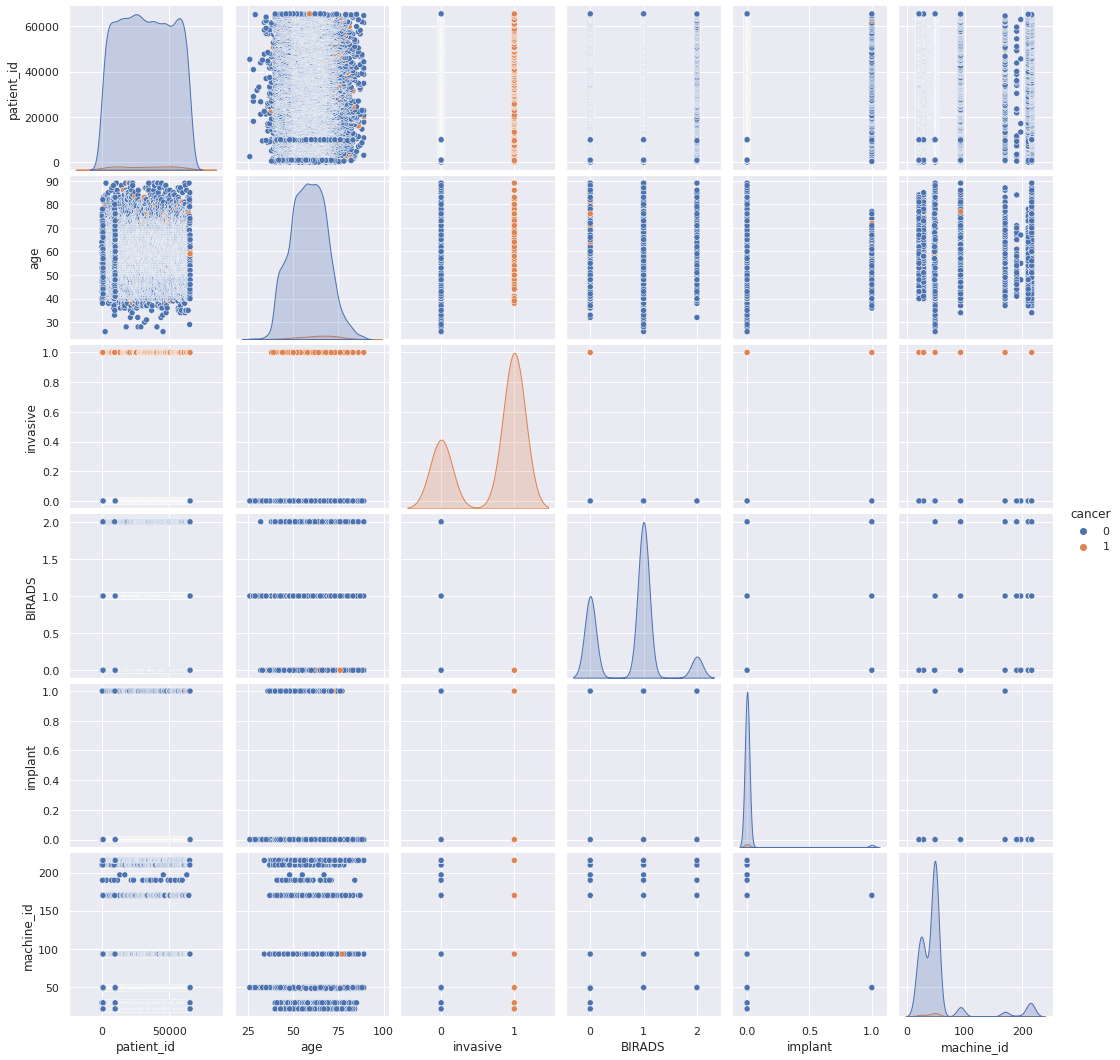

In [7]:
df_train_results['image_count'] = df_train_results.groupby('patient_id')['patient_id'].transform('count')
mu = df_train_results[df_train_results['image_count'] >= 4].drop_duplicates(subset=['patient_id'])
mu = mu[['patient_id','age','cancer','invasive','BIRADS','implant','machine_id']]
sns.pairplot(mu, hue="cancer")

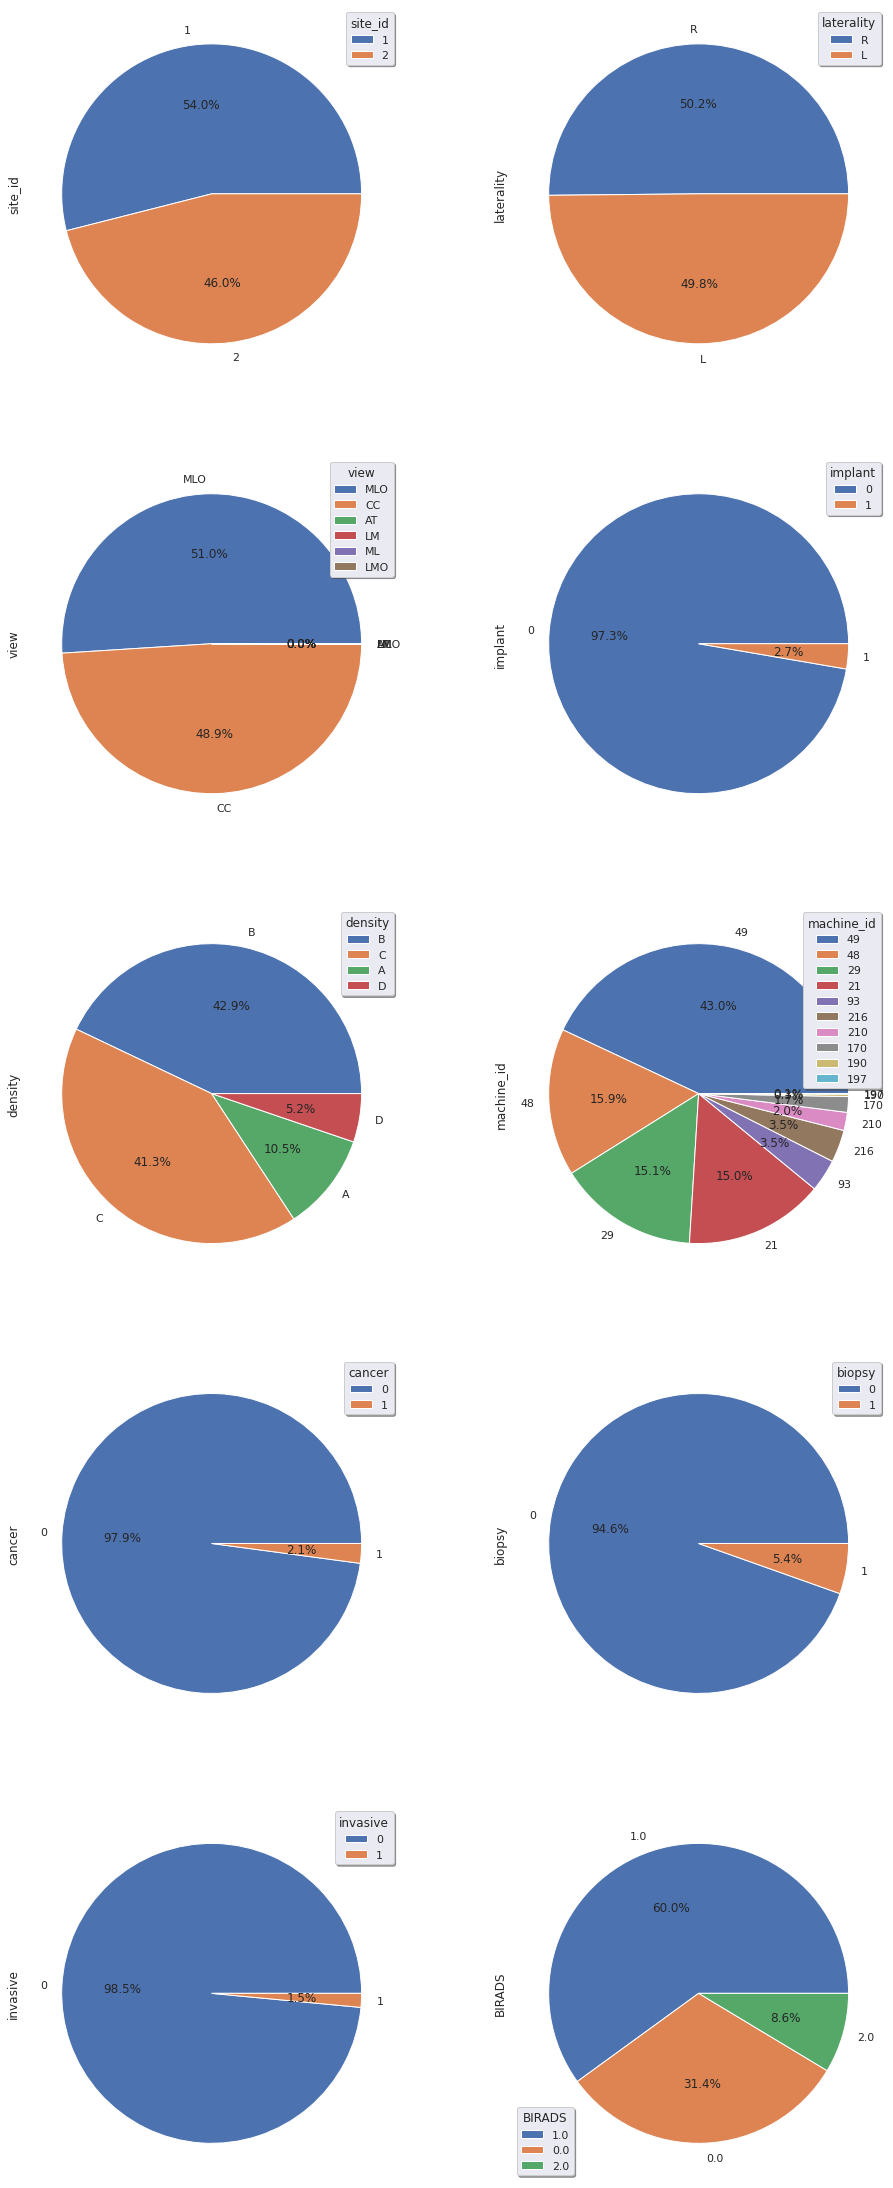

In [8]:
cols = ["site_id", "laterality", "view", "implant", "density", "machine_id","cancer", "biopsy", "invasive", "BIRADS" ]
nb_rows = int(np.ceil(len(cols) / 2))
_, axarr = plt.subplots(ncols=2, nrows=nb_rows, figsize=(16, 8 * nb_rows))
for i, col in enumerate(cols):
    df_train_results[col].value_counts().plot.pie(ax=axarr[i // 2, i % 2], autopct="%.1f%%" )
    axarr[i // 2, i % 2].legend(loc='best',shadow=True, title=col, fancybox=True)


In [9]:
pd.pivot_table(df_train_results, index ='cancer', columns = 'BIRADS', values ='patient_id',  aggfunc=pd.Series.nunique)

BIRADS,0.0,1.0,2.0
cancer,,,
0,3035.0,3151.0,604.0
1,252.0,NaN,NaN


In [10]:
patient_ages = [{"patient_id": pid, "ages": len(dfg["age"].unique())} for pid, dfg in df_train_results.groupby("patient_id")]
pd.DataFrame(patient_ages)["ages"].value_counts()

1    11913
Name: ages, dtype: int64

implant
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

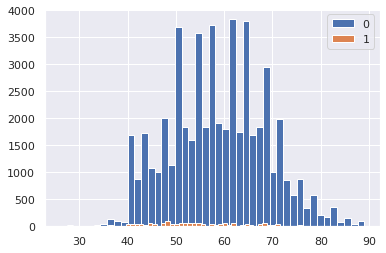

In [11]:
df_train_results.groupby("implant")["age"].hist(bins=45, legend=True)

cancer
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

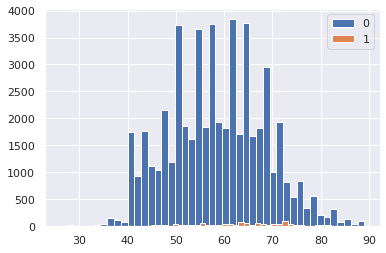

In [12]:
df_train_results.groupby("cancer")["age"].hist(bins=45, legend=True)
#df_train_results.groupby("cancer")["age"].apply(lambda x: x) 

biopsy
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

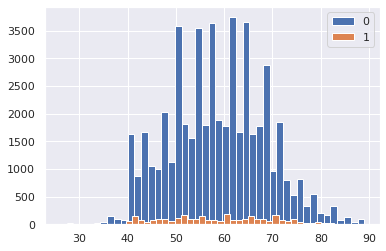

In [13]:
df_train_results.groupby("biopsy")["age"].hist(bins=45, legend=True)

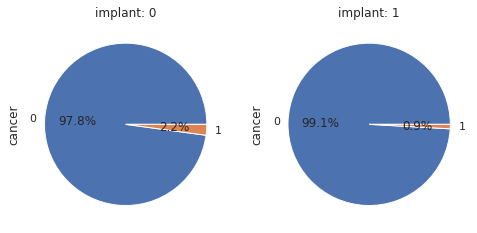

In [14]:
_, axarr = plt.subplots(ncols=2, figsize=(8, 4))
for i, (implant, dfg) in enumerate(df_train_results.groupby("implant")):
    dfg["cancer"].value_counts().plot.pie(ax=axarr[i], autopct="%.1f%%")
    axarr[i].set_title(f"implant: {implant}")

<AxesSubplot:xlabel='machine_id', ylabel='count'>

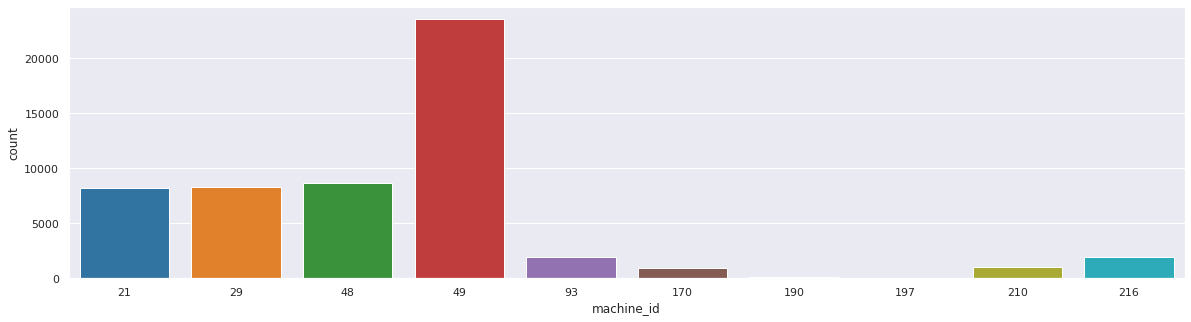

In [15]:
fig, ax = plt.subplots(1,1,figsize=(20,5))
sns.countplot(df_train_results.machine_id, palette='tab10', ax=ax)

<AxesSubplot:xlabel='BIRADS', ylabel='count'>

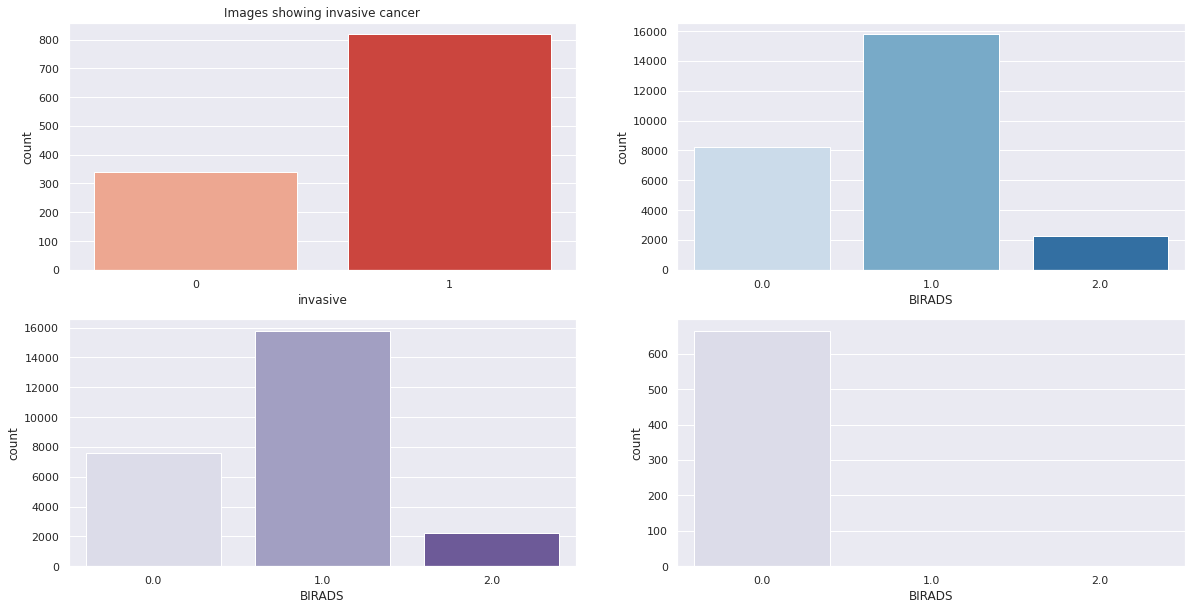

In [16]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
sns.countplot(df_train_results[df_train_results.cancer==1].invasive, ax=ax[0,0], palette='Reds')
sns.countplot(df_train_results.BIRADS, order=[0., 1., 2.], ax=ax[0,1], palette='Blues')
ax[0,0].set_title('Images showing invasive cancer');
sns.countplot(df_train_results[df_train_results.cancer==0].BIRADS, order=[0., 1., 2.], ax=ax[1,0], palette='Purples')
sns.countplot(df_train_results[df_train_results.cancer==1].BIRADS, order=[0., 1., 2.], ax=ax[1,1], palette='Purples')